# Health Burden

## Set up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
data = pd.read_csv('./data/prepped/risk-data.csv')
data.head()

,country,country_code,super_region,region,sex,age,pop,alcohol_use,drug_use,high_meat,low_exercise,smoking
0,China,CHN,"Southeast Asia, East Asia, and Oceania",East Asia,male,70+ years,3.818010e+07,336.913532,40.210751,5.069854,248.266850,1944.480464
1,China,CHN,"Southeast Asia, East Asia, and Oceania",East Asia,female,50-69 years,1.530703e+08,21.000557,4.697916,1.077716,12.919982,37.807709
2,China,CHN,"Southeast Asia, East Asia, and Oceania",East Asia,male,Under 5,4.458679e+07,0.236908,0.120827,NaN,NaN,NaN
3,China,CHN,"Southeast Asia, East Asia, and Oceania",East Asia,male,5-14 years,8.299538e+07,1.292633,0.038498,NaN,NaN,NaN
4,China,CHN,"Southeast Asia, East Asia, and Oceania",East Asia,male,15-49 years,3.901690e+08,35.849941,5.677337,0.188490,3.058205,30.797507


## Data Structure
To get a basic sense of your dataset, check the following:

- What is the size of the dataset (rows, columns)?
- How many countries are present in the dataset?
- What are the age-groups in the dataset?
- What are the variables (columns) present in the dataset?
- What is the data type of each variable?
- What are the summary statistics of each quantitative variable (_hint: `describe()`_)

Note the **count** for each column, and investigate why these may be inconsistent.

In [20]:
# Size of dataset
dataset_size = data.shape

# How many countries?
num_countries = len(data.country.unique())

# Age groups
age_groups = data.age.unique()

# Dataset variables
variables = list(data)

# Datatypes of each variable
variable_types = data.dtypes

# Summary statistics of each quantitative variable
summary = data.describe()

print("Dataset size: {}\n\nNumber of countries: {}\n\nAge groups: {}\n\nVariables:{} \n\nVariable Types: {}\n\nSummary: {}"
      .format(dataset_size, num_countries, age_groups, variables, variable_types, summary))

Dataset size: (1950, 12)

Number of countries: 195

Age groups: ['70+ years' '50-69 years' 'Under 5' '5-14 years' '15-49 years']

Variables:['country', 'country_code', 'super_region', 'region', 'sex', 'age', 'pop', 'alcohol_use', 'drug_use', 'high_meat', 'low_exercise', 'smoking'] 

Variable Types: country          object
country_code     object
super_region     object
region           object
sex              object
age              object
pop             float64
alcohol_use     float64
drug_use        float64
high_meat       float64
low_exercise    float64
smoking         float64
dtype: object

Summary:                 pop  alcohol_use     drug_use    high_meat  low_exercise  \
count  1.950000e+03  1950.000000  1950.000000  1170.000000   1170.000000   
mean   3.777708e+06    47.146545     7.128357     2.594225    119.552443   
std    1.913391e+07    86.009150    14.197640     4.043355    153.239610   
min    3.563755e+02  -106.232008     0.000038     0.000176      0.308731   
25%    1


## Univariate Analysis
To explore the distribution of each risk-column in a visual way, create a plot with multiple sub-plots where each sub-plot is a histogram of a risk-column. This [example](https://matplotlib.org/1.4.3/examples/statistics/histogram_demo_multihist.html) may be helpful.

- Note what you find surprising!

_Hint:_ You may want to use a loop to create each histogram

_ Another hint_: You may have to **remove NaN values** to make your histograms

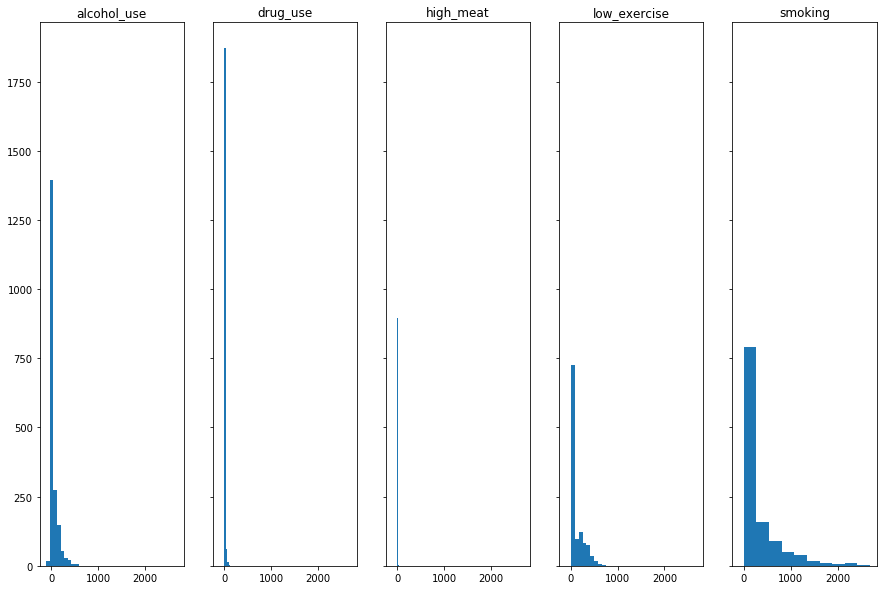

In [21]:
plt.close('all')
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 10), sharex=True, sharey=True)

for index, col in enumerate(data.columns[7:len(data.columns) + 1]):
    axes.flat[index].hist(data[col].dropna())
    axes.flat[index].set_title(col)
plt.show()

## Univariate analysis (by age)
In this section, you should **write a function** to investigate how a given risk (column) varies by **age group**. More specifically, the function should create a set of histograms (one for each age-group) to show the distribution of death rates across countries for a given risk factor.

Make sure to **include a docstring** to describe your function.

In [22]:
def show_dist_by_age(risk):
    """This function takes in a risk (column) and shows the age distribution of that risk"""
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 10), sharex=True, sharey=True)
    for index, (title, group) in enumerate(data.groupby('age')):
        axes.flat[index].hist(group[risk].dropna())
        axes.flat[index].set_title(title)
    plt.show()

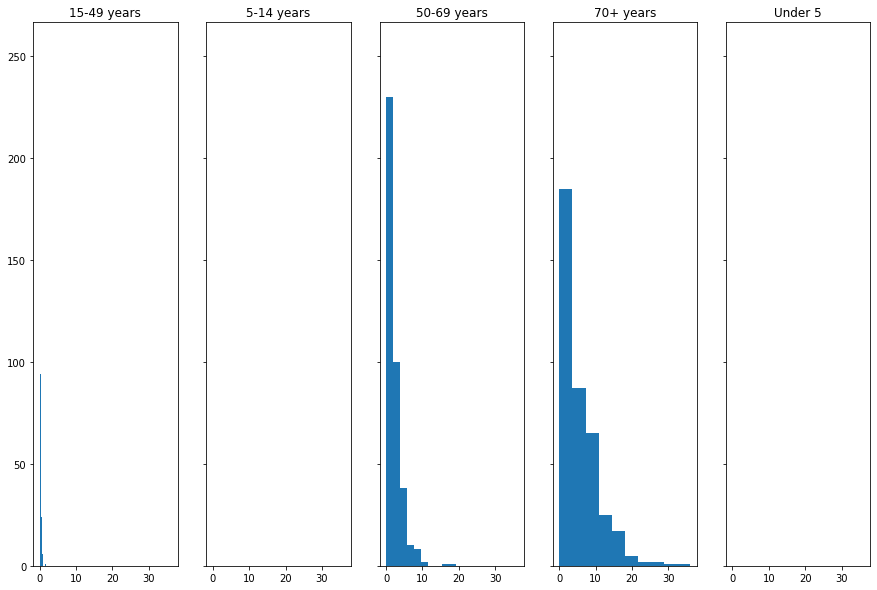

In [23]:
show_dist_by_age('high_meat')

## Univariate analysis (by sex)
In this section, you should investigate how a given risk (column) varies by **sex**. To do this, **write a function** to create a single histogram with _overlapping distributions_ for men and women (for a given risk factor). 

Make sure to include a **docstring**. 

_Hint_: turn down the _alpha_ (opacity) to help reduce occlusion in the chart. 

In [24]:
def show_dist_by_sex(risk):
    '''This function takes in a risk (column) and shows the sex distribution of that risk in a histogram'''
    for title, group in data.groupby('sex'):
        plt.hist(group[risk].dropna(), alpha=0.5, label=title)
        plt.legend(loc='upper right')
    plt.show()

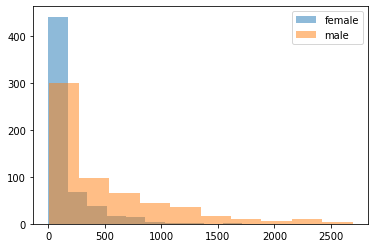

In [25]:
show_dist_by_sex('smoking')

## Univariate analysis (by super_region)

### Data Prep
In this section, you should investigate how each risk (column) varies by **super_region**. In order to do this, you'll need to **convert death rates to deaths** by multiplying the death rate by the `pop` column. Then, aggregate the data using the **group by** function (grouping by `super_region`) to compute the total number of deaths. Then, you'll need to _convert back_ to death _rates_ by dividing each risk by the aggregated `pop` column.

### Visualization
Then, you should write **two functions** that visualize your **aggregated** dataset:

1. For a given **risk factor**, show a bar chart of the death rate in each **super region**.
2. For a given **super region**, show a bar chart of the death rate for each **risk**.

Make sure to include a **docstring** for each function. 

In [26]:
df = data.copy().dropna()

# Convert death rates to deaths
for col in df.columns[7:len(df.columns) + 1]:
    df[col] = df[col] * df['pop']

# Aggregate by super region
df = df.groupby('super_region').sum().reset_index()

# Convert back to rate
for col in df.columns[2:len(df.columns) + 1]:
    df[col] = df[col] / df['pop']

df

,super_region,pop,alcohol_use,drug_use,high_meat,low_exercise,smoking
0,"Central Europe, Eastern Europe, and Central Asia",3.466415e+08,115.804510,22.546002,1.347551,55.494938,197.402084
1,High-income,8.909083e+08,30.297827,15.531443,2.127817,42.031706,161.168064
2,Latin America and Caribbean,4.204660e+08,42.574280,6.408012,1.322069,28.639183,68.159292
3,North Africa and Middle East,3.900456e+08,11.699879,6.073744,0.167872,34.096407,66.630495
4,South Asia,1.189760e+09,32.033449,4.221249,0.020719,27.169908,87.478074
5,"Southeast Asia, East Asia, and Oceania",1.670508e+09,46.471568,7.780311,0.648656,23.100463,147.241167
6,Sub-Saharan Africa,5.470018e+08,44.485406,6.919858,0.316985,13.566584,41.930845


In [27]:
# Bar charts by region for a given risk
def show_regions_by_risk(risk):
    '''This function takes in a risk (column) and shows the super region distribution'''
    plt.bar(df['super_region'], df[risk])
    plt.show()
    
    
# Bar charts by risk for a given region
def show_risk_by_region(region):
    x = list(df.columns[2:len(df.columns) + 1])
    y = df[df['super_region'] == region].values[0][2:]
    plt.bar(x,y)
    plt.show()

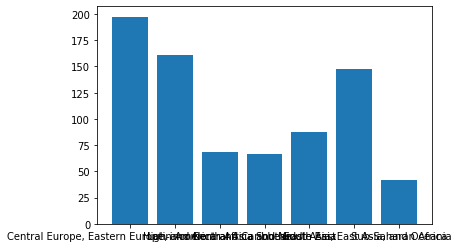

In [28]:
# Use your first function to show the smoking death rate in each region
show_regions_by_risk('smoking')

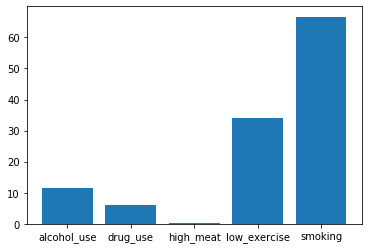

In [32]:
# User your second function to show the death rate for each risk in the "South Asia" region
show_risk_by_region('North Africa and Middle East')

## Bivariate analysis
As a final step, create a **scatterplot matrix** of all of your risks to visually assess the correlation across death rates. Hint: see [documentation](https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot).

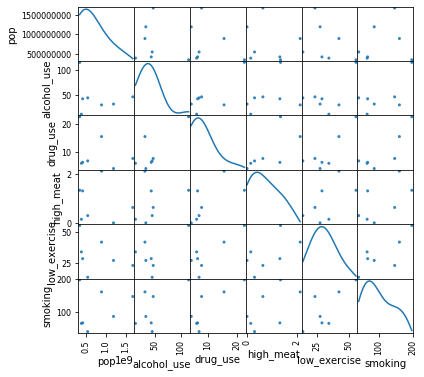

In [37]:
scatter_matrix(df, alpha=0.9, figsize=(6, 6), diagonal='kde')
plt.show()